In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfca=pd.read_csv("cleanedCustomerAddress.csv")

In [3]:
dfca

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation
0,1,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...
3994,3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [4]:
dfca["postcode"].value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

In [5]:
dfca["country"].value_counts()

Australia    3999
Name: country, dtype: int64

In [6]:
dfca["property_valuation"].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [7]:
dfcd=pd.read_csv("cleanedCustomerDemographic.csv")

In [8]:
dfcd

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.000000
1,2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.000000
2,3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.000000
3,4,4,Talbot,Dearle,Male,33,1961-10-03 00:00:00,Recruiting Manager,IT,Mass Customer,N,No,7.000000
4,5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,IT,Affluent Customer,N,Yes,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19.000000
3996,3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1.000000
3997,3998,3998,Sarene,Woolley,U,60,2001-07-13 00:00:00,Assistant Manager,IT,High Net Worth,N,No,10.657041
3998,3999,3999,Patrizius,Woolley,Male,11,1973-10-24 00:00:00,Assistant Manager,Manufacturing,Affluent Customer,N,Yes,10.000000


Text(0.5, 1.0, 'No.of Old Customers V/S wealth_segment')

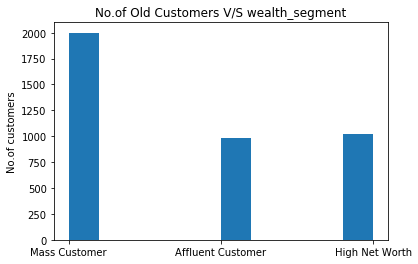

In [24]:
plt.hist(dfcd["wealth_segment"])
plt.ylabel("No.of customers")
plt.title("No.of Old Customers V/S wealth_segment")

In [10]:
dfcd["gender"].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [11]:
gendf=pd.DataFrame(dfcd["gender"])

gendf[gendf["gender"]=='F']="Female"
gendf[gendf["gender"]=='Femal']="Female"
gendf[gendf["gender"]=='M']="Male"
gendf[gendf["gender"]=='U']="Other"
gendf["gender"].value_counts()

Female    2039
Male      1873
Other       88
Name: gender, dtype: int64

Text(0.5, 1.0, 'No of Old Customers vs gender')

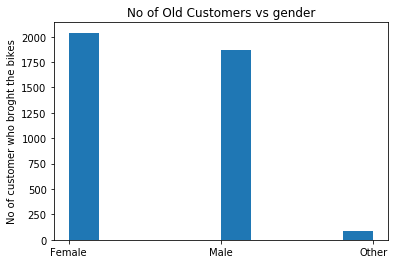

In [25]:
plt.hist(gendf["gender"])
plt.ylabel("No of customer who broght the bikes")
plt.title("No of Old Customers vs gender")

Text(0.5, 1.0, 'Old Customers past_3_years_bike_related_purchases v/s gender')

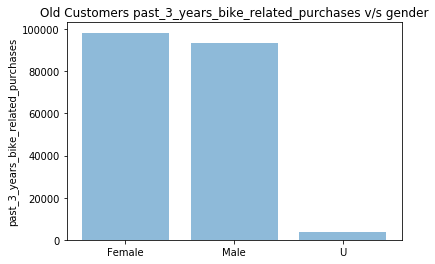

In [26]:
dfcd["gender"]=gendf["gender"]
tempdf=pd.DataFrame(dfcd["gender"])
tempdf["past_3_years_bike_related_purchases"]=dfcd["past_3_years_bike_related_purchases"]
tempdf
li=tempdf.groupby(["gender"]).sum()
li["gender"]=["Female" ,"Male", "U"]
plt.bar(li["gender"], li["past_3_years_bike_related_purchases"], align='center', alpha=0.5)
plt.ylabel("past_3_years_bike_related_purchases")
plt.title("Old Customers past_3_years_bike_related_purchases v/s gender")

In [51]:
dfcd["gender"]=gendf["gender"]

In [52]:
dfcd["job_title"].value_counts()

Business Systems Development Analyst    53
Recruiting Manager                      52
Legal Assistant                         48
Social Worker                           47
Sales Representative                    46
                                        ..
Human Resources Assistant IV             4
Computer Systems Analyst III             4
Systems Administrator IV                 4
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [61]:
dfcd["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

Text(0.5, 1.0, 'Old Customers job_industry_category V/S No. of customers')

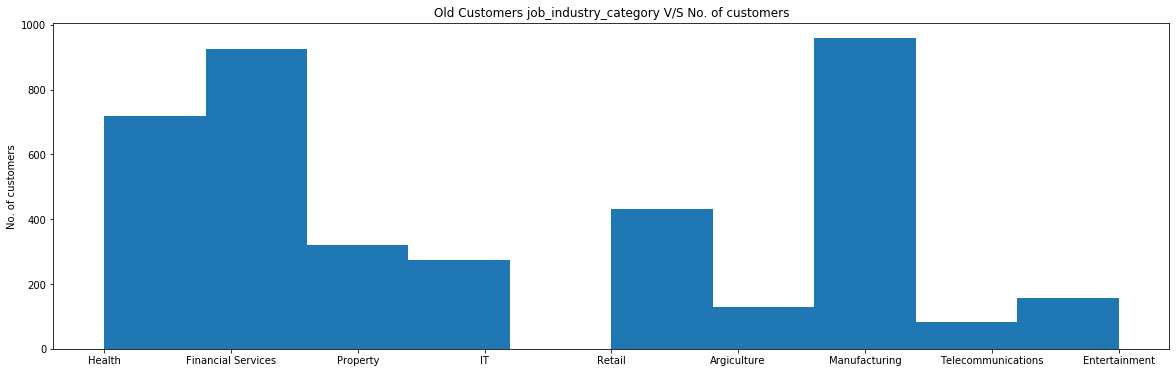

In [30]:
li=dfcd["job_industry_category"].value_counts()
# plt.figure(figsize=(20,10))
plt.figure(figsize=(20,6))
plt.hist(dfcd["job_industry_category"])
plt.ylabel("No. of customers")
plt.title("Old Customers job_industry_category V/S No. of customers")

In [21]:
temp = pd.DatetimeIndex(dfcd['DOB']).year
dfcd["year"]=temp
dfcd["age"]=2020-dfcd["year"]
agelist=dfcd["age"].to_list()
templi=[]
for i in agelist:
   
    if i>=0 and i<20:
        templi.append("0-20")
    elif i>=20 and i<30:
        templi.append("20-30")
    elif i>=30 and i<40:
        templi.append("30-40")
    elif i>=40 and i<50:
        templi.append("40-50")
    elif i>=50 and i<60:
        templi.append("50-60")
    elif i>=60:
        templi.append("above 60")
dfcd["age category"]=templi

Text(0.5, 1.0, 'No.of Old Customers V/S age_category')

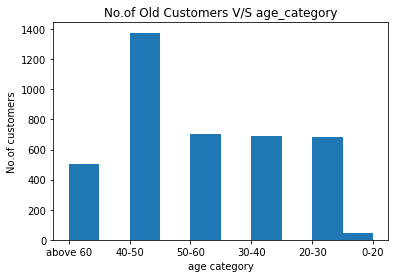

In [28]:
plt.hist(dfcd["age category"])
plt.ylabel("No.of customers")
plt.xlabel("age category")
plt.title("No.of Old Customers V/S age_category")

In [65]:
tran=pd.read_csv("Transactions.csv")

In [67]:
tran

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [68]:
tran["product_class"].value_counts()

medium    13959
high       3038
low        3003
Name: product_class, dtype: int64

In [69]:
tran["product_size"].value_counts()

medium    13959
high       3038
low        3003
Name: product_class, dtype: int64

In [72]:
tran["product_line"].value_counts()

Standard    14308
Road         4014
Touring      1250
Mountain      428
Name: product_line, dtype: int64

In [73]:
tran["brand"].value_counts()

Solex             4300
Giant Bicycles    3344
WeareA2B          3331
OHM Cycles        3072
Trek Bicycles     3016
Norco Bicycles    2937
Name: brand, dtype: int64